# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Christine Berlingeri

**ID**: cnb53

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/BEE 4750/hw1-cnb53`
   Installed GR_jll ────────────────────── v0.73.5+0
   Installed EarCut_jll ────────────────── v2.2.4+0
   Installed ConcurrentUtilities ───────── v2.4.1
   Installed ArnoldiMethod ─────────────── v0.4.0
   Installed OffsetArrays ──────────────── v1.14.0
   Installed NetworkLayout ─────────────── v0.4.6
   Installed StaticArrays ──────────────── v1.9.4
   Installed StaticArraysCore ──────────── v1.4.2
   Installed IJulia ────────────────────── v1.24.2
   Installed TranscodingStreams ────────── v0.10.9
   Installed GLFW_jll ──────────────────── v3.3.9+0
   Installed CodecZlib ─────────────────── v0.7.4
   Installed Ratios ────────────────────── v0.4.5
   Installed GraphRecipes ──────────────── v0.5.13
   Installed Xorg_libxcb_jll ───────────── v1.15.0+0
   Installed Graphs ────────────────────── v1.11.0
   Installed Conda ─────────────────────── v1.10.0
   Installed TableTraits ───────────────── v1.0.1
   Installed GeometryTypes ──────────

Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [2]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [ ]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

In [4]:
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


The problem with this code lies in the logistics. This is because min_value is initialized at 0. If all the elements in the array are greater than 0, the function will incorrectly return 0 instead of the minimum value in the array.
 

#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [ ]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

In [8]:
import Pkg
Pkg.add("Statistics")
using Statistics

#define a functoin that computes the class average grade 
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end

@show class_average(student_grades);

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/BEE 4750/hw1-cnb53/Project.toml`
  [10745b16] + Statistics v1.10.0
    Updating `~/BEE 4750/hw1-cnb53/Manifest.toml`
  [8e850b90] ↑ libblastrampoline_jll v5.8.0+1 ⇒ v5.11.0+0


class_average(student_grades) = 94.4


The logical error in this code lies in the class_average function where student_grades is used instead of the parameter grades. This means the function is using the global paramter student_grades instead of the input grades parameter. Additionally, the mean function is from the statistics module which must be imported in order to use the mean function. 

The syntax error happens in the line "@show average_grade;" which is not in the global scope. The function needs to be called (with and input) before displaying.

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [84]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

In [82]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1000
outcomes = falses(n_trials)

for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.376


The logical errror is using zero() instead of false(), this is because we are storing logical results (true/false) which are bools and when we use zero() it stores ints not bools.

The syntax error happens at n_trials where the value is 1_000 when it should be 1000. 

### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [25]:
#define a function to remove duplicate values from a list
function mystery_function(values)
    y = [] #create an empty array to store elements
    for v in values #initialize an empty list to store unique values
        if !(v in y) #checks if v is NOT in array y
            append!(y, v) #if above is true, then v is appended to the end of array y
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


In [86]:
list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show unique(list_of_values);

unique(list_of_values) = [1, 2, 3, 4]


The purpose of this function is to remove duplicates from an input list and return a list with unique values only.

Julia has a function callled "unique" that does the same thing as the code above, example is listed above.

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.


In [54]:
#define a function to take the average of a vector
function compute_mean(v)
    for i in v
        total_sum = sum(v)
        count = length(v)
        mean = total_sum / count
        return mean    
    end
end

#create a random vector 1 through 10, of 10 values.
random_vect = rand(1:10, 10)
vect_mean = compute_mean(random_vect) 

#subtracting the (random) vector mean from the (random) vector
new_vect = random_vect .- vect_mean

#evaluating the mean of the new vector
compute_mean(new_vect)

-3.552713678800501e-16

In this question we are taking the average of a vector then subtracting the average from that same vector and retaking the average. This should result in a new average of zero!


### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

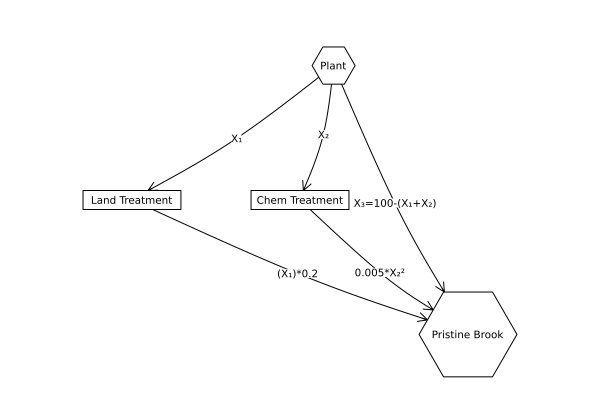

In [48]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => "X₁", (1,3) => "X₂", (1, 4) => "X₃=100-(X₁+X₂)",(2, 4) => "(X₁)*0.2",(3, 4) => "0.005*X₂²")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).


C(X1,X2)=((X1^2)/20)+1.5*X2

P(X1,X2)=100-0.8*X1+(0.005*X2-1)*X2


-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.


In [164]:
Cyuk = 1 #kg/m³
Qww = 100 #m³/day

Q₁ = (1/3)*Qww #concentration flow rate into land treatment
Q₂ = (1/3)*Qww #concentration flow rate into chemical treatment
Q₃ = 100-(Q₂+Q₁) #concentration flow rate into brook (untreated)

C₃ = Q₃*Cyuk

function cost(x,y) #function for cost of method 1 and 2
    return ((x.^2)/20, 1.5*y)
end 

X₁, X₂ = cost(Q₁,Q₂); #cost based on concentration flow rates inputs

total_cost = X₁+X₂; 

function concentration(x,y) #function for concentration into brook
    return (x*0.2, (0.005)*y.^2)
end
C₁, C₂ = concentration(Q₁, Q₂); #concentraion based on concentration flow rates inputs

total_concentration = C₁+C₂+C₃; 


-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?


In [158]:
Cyuk = 1 #kg/m³
Qww = 100 #m³/day

Q₁ = (0.6)*Qww #concentration flow rate into land treatment
Q₂ = (0.4)*Qww #concentration flow rate into chemical treatment
Q₃ = 100-(Q₂+Q₁) #concentration flow rate into brook (untreated)

C₃ = Q₃*Cyuk

function cost(x,y) #function for cost of method 1 and 2
    return ((x.^2)/20, 1.5*y)
end 

X₁, X₂ = cost(Q₁,Q₂); #cost based on concentration flow rates inputs

total_cost = X₁+X₂; 

function concentration(x,y) #function for concentration into brook
    return (x*0.2, (0.005)*y.^2)
end
C₁, C₂ = concentration(Q₁, Q₂); #concentraion based on concentration flow rates inputs

total_concentration = C₁+C₂+C₃; 

In [159]:
total_concentration

20.0

In [160]:
total_cost

240.0

One combination that satisfies the YUK effluent is Q₁ = 60 m³/day, Q₂ = 40 m³/day, and Q₃ = 0 m³/day resulting in a total concentration of 20.0 kg/m³. This combonation results in a total cost of $240.

The tradeoff between YUK and cost is a direct relationship, as the YUK concentration decreases the cost of treatment increases. 

To find a better, more optimal solution I would need a lot more if not all combinations of waste water going through x1 and x2. 

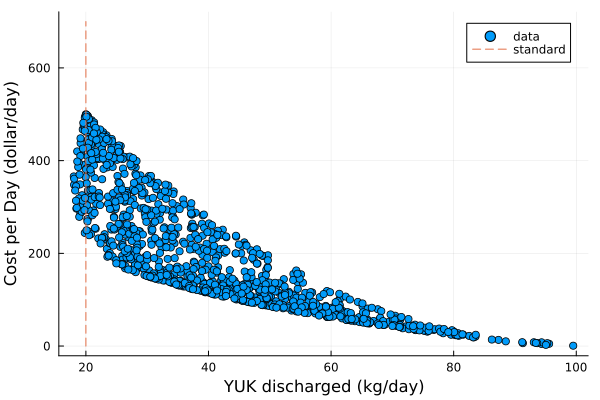

In [130]:
Cyuk = 1 #kg/m³
Qww = 100 #m³/day

results = []
results_y = []

#define function for concentration into the brook
function concentration(x,y) 
    return x*0.2, (0.005)*y.^2
end

#define function for cost of treatment
function cost(x,y)
    return ((x.^2)/20, 1.5*y)
end 

for j in 0:1:1000
    a = rand(0:0.001:1) #compute random value for q1
    b = rand(0:0.001:(1-a)) #compute random value for q2 (bounded to 1-q1)
    Q₁ = a*Qww 
    Q₂ = b*Qww 
    Q₃ = 100-(Q₂+Q₁) 

    C₃ = Q₃*Cyuk

    C₁, C₂ = concentration(Q₁, Q₂); #concentration given concentration flow rates
    total_concentration = C₁+C₂+C₃; #sum of concentrations of method 1 and 2

    X₁, X₂ = cost(Q₁,Q₂); #compute partial costs
    
    total_cost = X₁+X₂; #compute total costs
    
    #save data
    append!(results,total_concentration)
    append!(results_y, total_cost)
end 

#plot data as a scatter plot as well as YUK effluent standard
plot(results, results_y, seriestype=:scatter, label="data", xlabel="YUK discharged (kg/day)", ylabel="Cost per Day (dollar/day)")
plot!([20,20],[0,700],label="standard", linestyle = :dash) 


### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

I had help from Camden Wehrle on Question 4, specifically on helping me understand what is necessary to find an optimal solution. 